# Do not update the first cell (it's related to surface/formation structure)

In [1]:
%load_ext autoreload
%autoreload 2
#### DO NOT UPDATE THIS CELL ########
import matplotlib.pyplot as plt
import numpy as np
from reservoir_grid import Stratigraphy_Grid
from scipy.spatial import Delaunay
import trimesh

# now you can play with this workflow below

In [2]:
top_2 = np.loadtxt('dataset/west_sea_2024/Base_SU7_middle_Miocene.dat')
top_2[:,2] *= -10
top = np.loadtxt('dataset/west_sea_2024/Base_SU6_Interbedded_Seal.dat')
top[:,2] *= -10
bottom = np.loadtxt('dataset/west_sea_2024/Base_SU5_Top_Cretaceous.dat')
bottom[:,2] *= -10

In [3]:
top_2_pts = top_2[:,0:2]
top_2_pts_3d = top_2

top_pts = top[:,0:2]
top_pts_3d = top
bottom_pts = bottom[:,0:2]
bottom_pts_3d = bottom

top_2_tri = Delaunay(top_2_pts)
top_tri = Delaunay(top_pts)
bottom_tri = Delaunay(bottom_pts)

top_2 = trimesh.Trimesh(vertices=top_2_pts_3d,
                    faces=top_2_tri.simplices,
                    process=True)

top = trimesh.Trimesh(vertices=top_pts_3d,
                    faces=top_tri.simplices,
                    process=True)
bottom = trimesh.Trimesh(vertices=bottom_pts_3d,
                    faces=bottom_tri.simplices,
                    process=True)


In [ ]:
heading_to_sky = np.array([0, 0, 1])
angles = np.arccos(np.sum(top.face_normals*heading_to_sky,axis = 1))

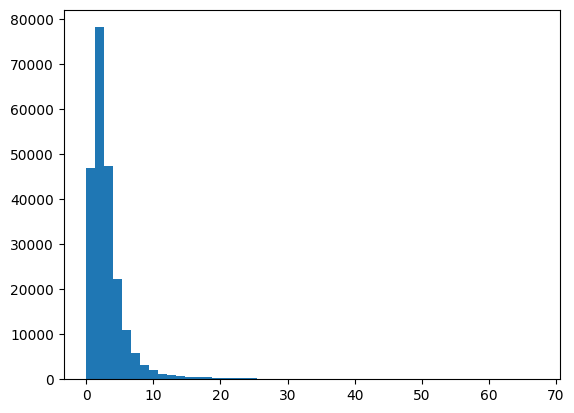

In [ ]:
angle_in_deg = np.rad2deg(angles)
# plt.hist(angle_in_deg, bins = 50);/

In [ ]:
threshold_to_tell_disconnect = np.percentile(angle_in_deg,98)
flag_of_fault = angle_in_deg > threshold_to_tell_disconnect
top_new = trimesh.Trimesh(vertices=top_pts_3d,
                    faces=top_tri.simplices[~flag_of_fault],
                    process=True)

In [45]:
visualize_surface([top_new])

In [ ]:

# # Define a function to handle the click event
# def onclick(event):
#     if event.xdata is not None and event.ydata is not None:
#         print(f"Clicked point: ({event.xdata}, {event.ydata})")


# fig, ax = plt.subplots(1,2)

# for i, surf in enumerate([top_pts_3d, bottom_pts_3d]):
    
#     ax[i].scatter(surf[:,0],
#                 surf[:,1],
#                 c = surf[:,2],
#                 s = 4)
#     plt.plot([x0,x0,x1,x1, x0], [y0, y1, y1, y0, y0], 'r-', linewidth=2)
# plt.tight_layout()
# # Connect the click event to the function
# cid = fig.canvas.mpl_connect('button_press_event', onclick)

# plt.show()

In [5]:
x0 = max(639484.0417479295, 639673.5766733686)
x1 = min(648283.877571888, 648040.1898106091)
y0 = max(3986237.336147831, 3986917.2039575293)
y1 = min(3990951.0862950725, 33990588.4901299)


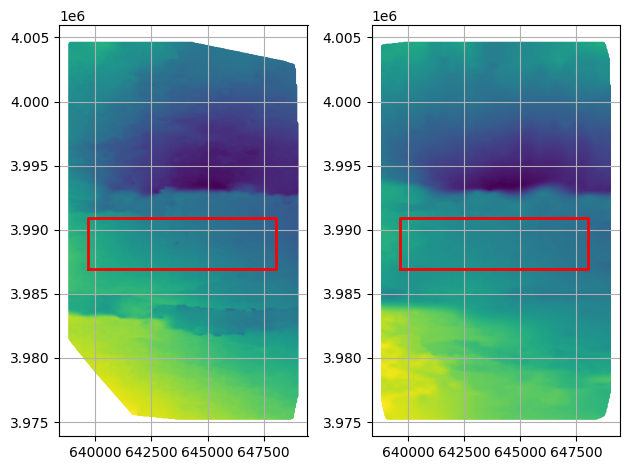

In [6]:
# %matplotlib inline
for i, surf in enumerate([top_pts_3d, bottom_pts_3d], 1):
    plt.subplot(1,2,i)
    plt.scatter(surf[:,0],
                surf[:,1],
                c = surf[:,2],
                s = 4)
    plt.plot([x0,x0,x1,x1, x0], [y0, y1, y1, y0, y0], 'r-', linewidth=2)
    plt.grid('on')
plt.tight_layout()
plt.show()

In [7]:
nx, ny, nz = 100, 100, 16

grid = Stratigraphy_Grid(num_grid = [nx, ny, nz], extent = [x0, x1, y0, y1], positive_depth = False)
grid.load_horizons(top,'top')
grid.load_horizons(bottom,'bottom')
grid.cmg_corner_point_generate('top','bottom')
grid.load_xx_yy_zz('top','bottom')

In [9]:
# quick check the structure grid
grid.visual_3D_from_formation_grid('top_to_bottom_formation',vertical_colorbar =False, aspect_ratio= 1)

Widget(value='<iframe src="http://localhost:60581/index.html?ui=P_0x2317e907b00_2&reconnect=auto" class="pyvis…

In [ ]:
grid.write_cmg_corner_points_input_file('.','top_to_bottom_formation')

In [ ]:
# load porosity and facies model whose size is 16x32x32 in z-, y-, and x-direction
Facies = np.load('facie_16x32x32.npy')
Porosity = np.load('porosity_16x32x32.npy')

In [ ]:
# let's check what are existing formation_grids in "Stratigraphy_Grid"
grid.print_formation_grids()

In [ ]:
# add properties to the formation grid (resampling is required so it may takes around 15 sec each
grid._add_value_to_grid(formation_name='top_to_bottom_formation',value = Facies,value_name = 'Facies')
grid._add_value_to_grid(formation_name='top_to_bottom_formation',value = Porosity,value_name = 'Porosity')


In [ ]:
# visualize Facies
grid.visual_3D_from_formation_grid('top_to_bottom_formation',value_name = 'Facies')